In [41]:
pwd

'/content/drive/My Drive/Colab Notebooks/DataWorkshop-Matrix/Matrix-III'

In [2]:
cd "drive/My Drive/Colab Notebooks/DataWorkshop-Matrix/"

/content/drive/My Drive/Colab Notebooks/DataWorkshop-Matrix


In [0]:
!mkdir Matrix-III

In [0]:
!mkdir Matrix-III/Data

In [5]:
ls

Data/  Data2/  LICENSE  Matrix-I/  Matrix-II/  Matrix-III/  README.md


In [6]:
ls Matrix-III/

Data/


In [43]:
cd Data

/content/drive/My Drive/Colab Notebooks/DataWorkshop-Matrix/Matrix-III/Data


In [0]:
ls

In [9]:
!curl -L http://bit.ly/train_road_sign -o train_road_sign.p

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0   6130      0 --:--:-- --:--:-- --:--:--  6130
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  102M  100  102M    0     0  30.3M      0  0:00:03  0:00:03 --:--:-- 48.7M


In [10]:
!curl -L http://bit.ly/test_road_sign -o test_road_sign.p

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   140  100   140    0     0   2978      0 --:--:-- --:--:-- --:--:--  2978
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12.9M  100 12.9M    0     0  6874k      0  0:00:01  0:00:01 --:--:-- 9750k


In [11]:
!curl -L http://bit.ly/dw_signnames -o sign_names.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   147  100   147    0     0   5068      0 --:--:-- --:--:-- --:--:--  5068
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   986  100   986    0     0   1045      0 --:--:-- --:--:-- --:--:--  1045


In [12]:
ls -lh

total 116M
-rw------- 1 root root  986 Apr  2 09:14 sign_names.csv
-rw------- 1 root root  13M Apr  2 09:13 test_road_sign.p
-rw------- 1 root root 103M Apr  2 09:13 train_road_sign.p


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [45]:
train = pd.read_pickle('train_road_sign.p')
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [46]:
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [51]:
signs = pd.read_csv('sign_names.csv')
signs.sample(10)

,a,b
29,29,Bicycles crossing
37,37,Go straight or left
38,38,Keep right
41,41,End of no passing
24,24,Road narrows on the right
42,42,End of no passing by vehicles over 3.5 metric ...
3,3,Speed limit (60km/h)
13,13,Yield
14,14,Stop
21,21,Double curve


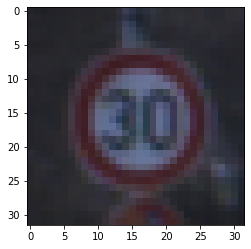

In [50]:
plt.imshow(X_train[4000])

In [0]:
dict_signs = signs.to_dict()['b']

In [66]:
for sign in dict_signs.keys():
  given_signs = X_train[y_train==sign]
  plt.figure(figsize=(15,5))
  for i in range(9):
    plt.subplot('19{0}'.format(i+1))
    plt.imshow(given_signs[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

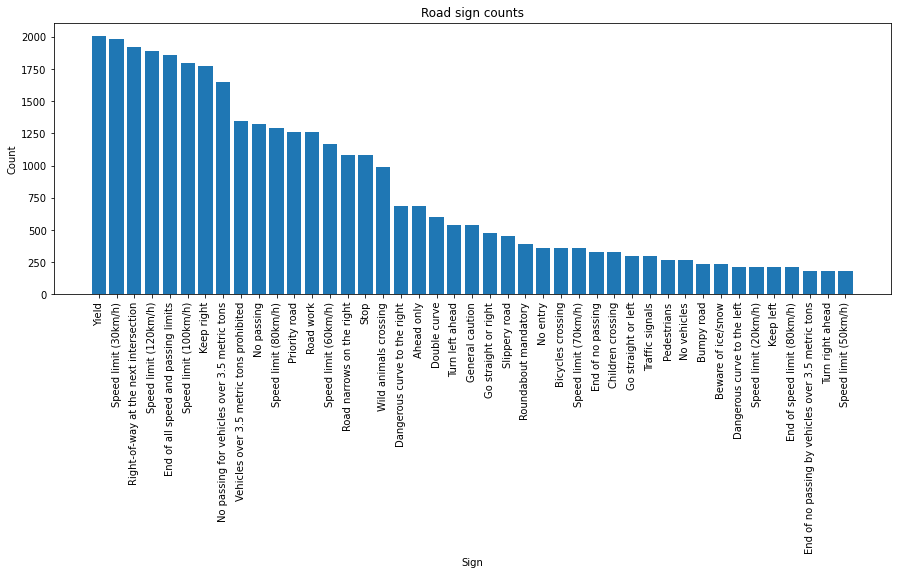

In [75]:
cnt = Counter(y_train).most_common()
label_ids, label_counts = zip(*cnt)
label_ids, label_counts
ids = range(len(label_ids))
plt.figure(figsize=(15,5))
plt.bar(ids, label_counts)
plt.xlabel('Sign')
plt.ylabel('Count')
labels = [dict_signs[label_ids[x]] for x in label_ids]
plt.xticks(ids, labels, rotation='vertical')
plt.title('Road sign counts')
plt.show()